In [1]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
TRAINING_DIR = "./Dataset3/Train"

training_datagen = ImageDataGenerator(rescale=1./255,
																			zoom_range=0.15,
																			horizontal_flip=True,
                                      fill_mode='nearest')

VALIDATION_DIR = "./Dataset3/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	shuffle = True,
	class_mode='categorical',
  batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
	shuffle = True,
  batch_size= 14
)

Found 1804 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

input_tensor = Input(shape=(224, 224, 3))

base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [4]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)

Epoch 1/20
14/14 [==============================] - 66s 4s/step - loss: 12.6413 - acc: 0.7864 - val_loss: 0.1247 - val_acc: 0.9541
Epoch 2/20
14/14 [==============================] - 61s 4s/step - loss: 0.0851 - acc: 0.9642 - val_loss: 0.4982 - val_acc: 0.8980
Epoch 3/20
14/14 [==============================] - 60s 4s/step - loss: 0.6390 - acc: 0.8807 - val_loss: 0.1154 - val_acc: 0.9643
Epoch 4/20
14/14 [==============================] - 60s 5s/step - loss: 0.0737 - acc: 0.9726 - val_loss: 0.1100 - val_acc: 0.9643
Epoch 5/20
14/14 [==============================] - 60s 4s/step - loss: 0.4483 - acc: 0.8944 - val_loss: 0.2338 - val_acc: 0.8827
Epoch 6/20
14/14 [==============================] - 60s 4s/step - loss: 0.1532 - acc: 0.9457 - val_loss: 0.1113 - val_acc: 0.9643
Epoch 7/20
14/14 [==============================] - 60s 4s/step - loss: 0.0803 - acc: 0.9767 - val_loss: 2.0127 - val_acc: 0.6990
Epoch 8/20
14/14 [==============================] - 59s 4s/step - loss: 0.2535 - acc: 0.9

In [5]:

for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)
print(len(base_model.layers))

Epoch 1/10
14/14 [==============================] - 73s 5s/step - loss: 0.3660 - acc: 0.8300 - val_loss: 0.1022 - val_acc: 0.9745
Epoch 2/10
14/14 [==============================] - 76s 5s/step - loss: 0.2991 - acc: 0.8568 - val_loss: 0.1018 - val_acc: 0.9745
Epoch 3/10
14/14 [==============================] - 73s 5s/step - loss: 0.2287 - acc: 0.8890 - val_loss: 0.1051 - val_acc: 0.9745
Epoch 4/10
14/14 [==============================] - 76s 5s/step - loss: 0.1993 - acc: 0.9129 - val_loss: 0.1080 - val_acc: 0.9745
Epoch 5/10
14/14 [==============================] - 72s 5s/step - loss: 0.1571 - acc: 0.9374 - val_loss: 0.1108 - val_acc: 0.9694
Epoch 6/10
14/14 [==============================] - 71s 5s/step - loss: 0.1461 - acc: 0.9409 - val_loss: 0.1123 - val_acc: 0.9694
Epoch 7/10
14/14 [==============================] - 72s 5s/step - loss: 0.1383 - acc: 0.9499 - val_loss: 0.1162 - val_acc: 0.9694
Epoch 8/10
14/14 [==============================] - 72s 5s/step - loss: 0.1096 - acc: 0.96

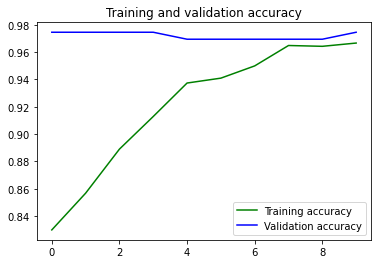

<Figure size 432x288 with 0 Axes>

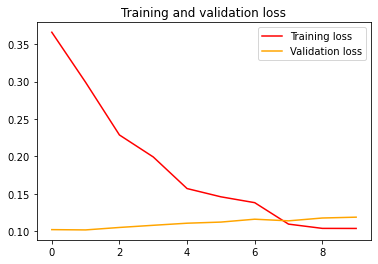

<Figure size 432x288 with 0 Axes>

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [7]:
#predicting any random image
import numpy as np
from keras.preprocessing import image
# files = ["./fire/1.jpg", "./fire/2.jpg", "./fire/3.jpg", "./fire/4.jpg", "./fire/5.jpg", "./fire/11.jpg"]
files = ["./fire/fog2.jpg"]

for path in files:
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(path, np.argmax(classes[0])==0, max(classes[0]))

./fire/fog2.jpg False 0.935806
